#**Merchant Recommendation System**

This project develops a recommender system for merchant, focusing on personalized merchant suggestions for users.

The dataset used in this project is “Digital Wallet Transaction”. This dataset simulates transactions from a digital wallet platform similar to popular services like PayTm in India or Khalti in Nepal. It contains 5000 synthetic records of various financial transactions across multiple categories, providing a rich source for analysis of digital payment behaviors and trends.

####Load and Preprocess the Data

In [1]:
import pandas as pd
import numpy as np

# load dataset
df = pd.read_csv("digital_wallet_transactions.csv")

# mengambil data dengan status transaksi sukses
df = df[df['transaction_status'] == "Successful"]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4755 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 4755 non-null   int64  
 1   transaction_id      4755 non-null   object 
 2   user_id             4755 non-null   object 
 3   transaction_date    4755 non-null   object 
 4   product_category    4755 non-null   object 
 5   product_name        4755 non-null   object 
 6   merchant_name       4755 non-null   object 
 7   product_amount      4755 non-null   float64
 8   transaction_fee     4755 non-null   float64
 9   cashback            4755 non-null   float64
 10  loyalty_points      4755 non-null   int64  
 11  payment_method      4755 non-null   object 
 12  transaction_status  4755 non-null   object 
 13  merchant_id         4755 non-null   object 
 14  device_type         4755 non-null   object 
 15  location            4755 non-null   object 
dtypes: float64(

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [2]:
# Total sales (sum of product_amount)
total_sales = df['product_amount'].sum()

# Total transactions (number of successful transactions)
total_transactions = df.shape[0]

# Total unique customers
total_customers = df['user_id'].nunique()

# Total unique products sold
total_unique_products = df['product_name'].nunique()

print("Total Sales: ", total_sales)
print("Total Transactions: ", total_transactions)
print("Total Customers: ", total_customers)
print("Total Unique Products Sold: ", total_unique_products)

Total Sales:  23559018.92
Total Transactions:  4755
Total Customers:  3783
Total Unique Products Sold:  100


In [3]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Find earliest and latest transaction date
min_date = df['transaction_date'].min()
max_date = df['transaction_date'].max()

print("Earliest Transaction Date:", min_date)
print("Latest Transaction Date:", max_date)

Earliest Transaction Date: 2023-08-19 03:32:00
Latest Transaction Date: 2024-08-18 01:15:00


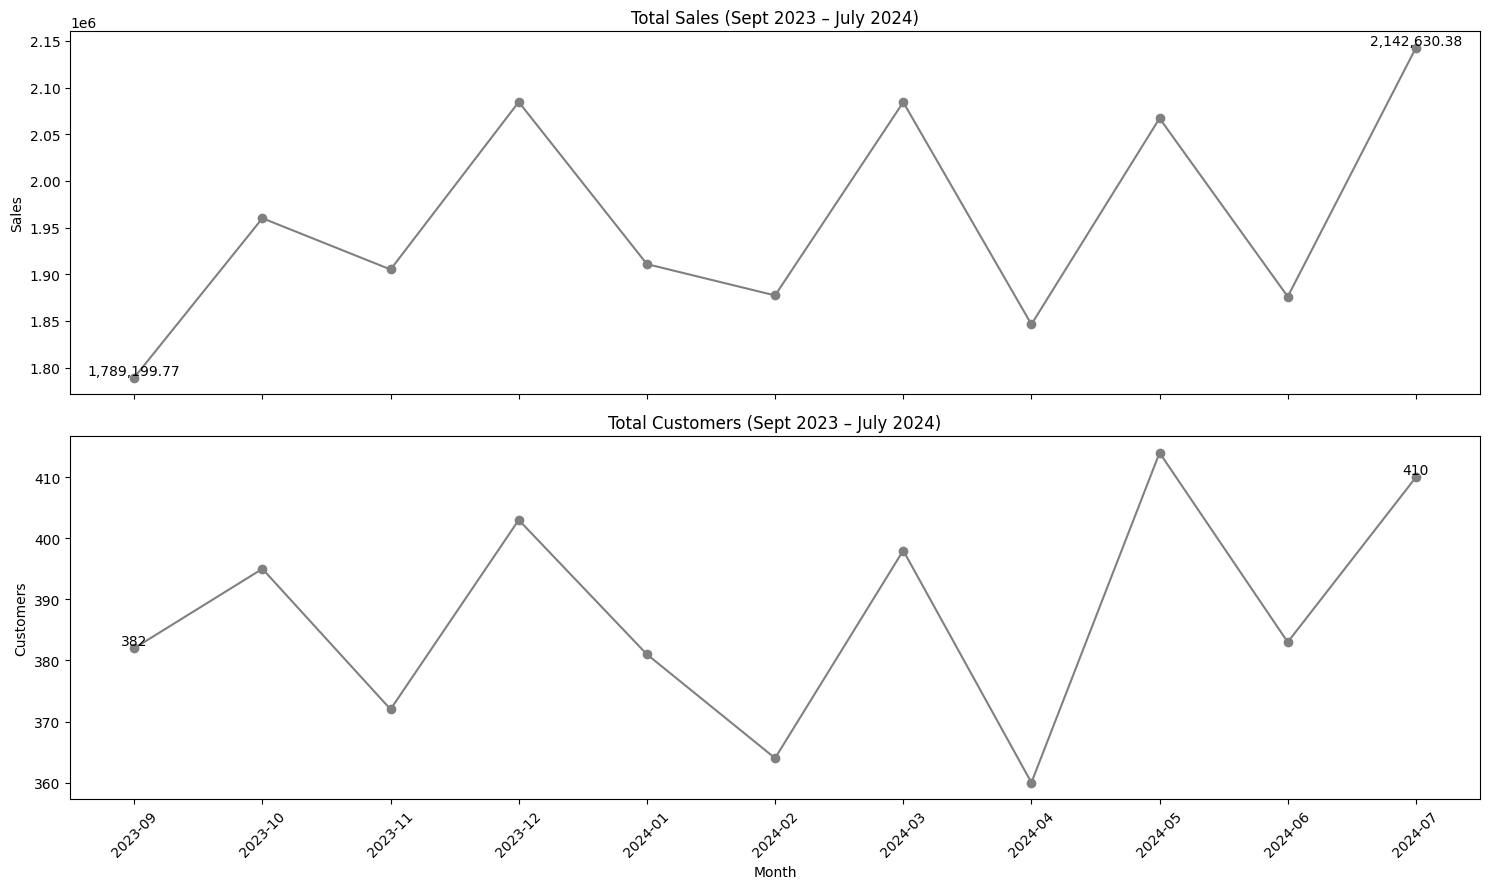

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure transaction_date is datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Create Year-Month column
df['YearMonth'] = df['transaction_date'].dt.to_period('M')

# Filter Sept 2023 – July 2024
mask = (df['YearMonth'] >= '2023-09') & (df['YearMonth'] <= '2024-07')
df_filtered = df[mask]

# Monthly sales
monthly_sales = df_filtered.groupby('YearMonth')['product_amount'].sum()

# Monthly unique customers
monthly_customers = df_filtered.groupby('YearMonth')['user_id'].nunique()

# Plot
fig, axes = plt.subplots(2, 1, figsize=(15, 9), sharex=True)

# Total Sales
axes[0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='gray')
axes[0].set_title("Total Sales (Sept 2023 – July 2024)")
axes[0].set_ylabel("Sales")
axes[0].text(0, monthly_sales.values[0], f"{monthly_sales.values[0]:,}", ha='center', va='bottom')
axes[0].text(len(monthly_sales)-1, monthly_sales.values[-1], f"{monthly_sales.values[-1]:,}", ha='center', va='bottom')

# Total Customers
axes[1].plot(monthly_customers.index.astype(str), monthly_customers.values, marker='o', color='gray')
axes[1].set_title("Total Customers (Sept 2023 – July 2024)")
axes[1].set_ylabel("Customers")
axes[1].set_xlabel("Month")
axes[1].text(0, monthly_customers.values[0], f"{monthly_customers.values[0]:,}", ha='center', va='bottom')
axes[1].text(len(monthly_customers)-1, monthly_customers.values[-1], f"{monthly_customers.values[-1]:,}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretations:**

The filtering process successfully reduced the dataset to include only completed transactions. This ensures that subsequent analysis—such as evaluating spending behavior, merchant performance, or cashback distribution—focuses exclusively on valid and finalized payments. The reduction from 5,000 to 4,755 entries highlights that a small portion of transactions did not succeed.

###**Collaborative Filtering: Matrix Factorization With SVD**


By leveraging transaction histories, the system applies **collaborative filtering** with **matrix factorization (SVD)** to uncover hidden patterns in user–merchant interactions. The goal is to predict user preferences and recommend new merchants that align with individual spending behavior, ultimately enhancing customer engagement and improving the overall digital wallet experience.

In [18]:
# user vs merchant interaction
user_item_matrix = df.groupby(['user_id', 'merchant_name'])['product_amount'].sum().reset_index()

# Normalization into a Rating Scale
user_item_matrix['rating'] = (user_item_matrix['product_amount'] - user_item_matrix['product_amount'].min()) / \
                             (user_item_matrix['product_amount'].max() - user_item_matrix['product_amount'].min())

user_item_matrix.head()

,user_id,merchant_name,product_amount,rating
0,USER_00001,Amazon Pantry,5810.65,0.337130
1,USER_00002,Amazon,1785.23,0.103171
2,USER_00019,BSNL,3883.54,0.225126
3,USER_00019,Domino's,1535.44,0.088654
4,USER_00020,Carnival Cinemas,3619.00,0.209750


**Interpretation:**

The process converts raw transaction data into a structured format where user–merchant interactions are represented as ratings. These normalized values can then be used to train recommender algorithms, enabling merchant recommendations.

In [7]:
!pip install numpy==1.26.4
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2611311 sha256=fe725388456ccbc55b34299c350b49d0a95b96f619feda163b8c70c303fa196b
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [19]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# prepare data for surprise
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(user_item_matrix[['user_id', 'merchant_name', 'rating']], reader)

# split data
trainset, testset = train_test_split(data, test_size=0.2)

# model SVD (matrix factorization)
algo = SVD()
algo.fit(trainset)

# evaluate
predictions = algo.test(testset)

print("RMSE:", accuracy.rmse(predictions))

RMSE: 0.1755
RMSE: 0.17545903194557572


**Conclusion:**

The SVD-based recommender system is able to generate predictions with reasonable accuracy, achieving an RMSE of about 0.3014 on normalized ratings. This provides a solid foundation.

In [45]:
# rekomendasi function
def recommend_merchants(user_id, n=5):
    # semua merchant unik
    all_merchants = df['merchant_name'].unique()

    # merchant yang sudah pernah dipakai user
    used_merchants = user_item_matrix[user_item_matrix['user_id'] == user_id]['merchant_name'].unique()

    # kandidat merchant baru
    candidates = [m for m in all_merchants if m not in used_merchants]

    # prediksi rating
    predictions = [(m, algo.predict(user_id, m).est) for m in candidates]

    # sort by rating
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]
    return recommendations


# contoh rekomendasi untuk user random
user = "USER_05939"
print(f"Recommendation for {user}:")
recs = recommend_merchants(user, n=5)
for merchant, score in recs:
    print(f"- {merchant} (score: {score:.4f})")

Recommendation for USER_05939:
- Snapdeal (score: 0.5914)
- Flipkart Supermart (score: 0.5459)
- SPI Cinemas (score: 0.4752)
- Gujarat Gas (score: 0.4748)
- Myntra (score: 0.4395)


**Recommendation Result for user_05939**:

The recommender system suggests the following top 5 merchants that the user has not interacted with before, ranked by predicted preference:

- Snapdeal (score: 0.5914)
- Flipkart Supermart (score: 0.5459)
- SPI Cinemas (score: 0.4752)
- Gujarat Gas (score: 0.4748)
- Myntra (score: 0.4395)

**Interpretation:**

*  The predicted ratings are on a scale from 0 to 1 (since transaction amounts were normalized).
*   A higher score means the model believes the user is more likely to engage with that merchant.
*   For user_05939, Snapdel is expected to be the most relevant recommendation, followed closely by Flipkart Supermart and SPI Cinemas.

###**Content Based Recommender System**

The script implements Recommender System with Content-Based Filtering using cosine similarity.

In [29]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# load data
df = pd.read_csv("digital_wallet_transactions.csv")

# hanya transaksi sukses
df = df[df['transaction_status'] == "Successful"]

# buat user-merchant matrix (nilai: jumlah transaksi atau total amount)
user_merchant = df.groupby(['user_id', 'merchant_name'])['product_amount'].sum().unstack().fillna(0)

# scaling (biar range sama)
scaler = MinMaxScaler()
user_merchant_scaled = scaler.fit_transform(user_merchant)

# cosine similarity antar merchant
merchant_similarity = cosine_similarity(user_merchant_scaled.T)  # transpose supaya merchant jadi axis
merchant_similarity_df = pd.DataFrame(merchant_similarity,
                                      index=user_merchant.columns,
                                      columns=user_merchant.columns)


In [30]:
def recommend_similar_merchants(merchant_name, n=5):
    if merchant_name not in merchant_similarity_df.index:
        return f"Merchant {merchant_name} tidak ada di data"

    # ambil skor similarity
    sim_scores = merchant_similarity_df[merchant_name].sort_values(ascending=False)

    # buang diri sendiri
    sim_scores = sim_scores.drop(merchant_name)

    # top-n recommendation
    return sim_scores.head(n)

# contoh: rekomendasi merchant mirip merchant_name tertentu
print(recommend_similar_merchants("Jugnoo", n=5))


merchant_name
LIC                0.054693
ICICI Bank         0.052990
Nature's Basket    0.051415
SonyLIV            0.043282
ACT Fibernet       0.038977
Name: Jugnoo, dtype: float64


**Item-Based approach**

In [32]:
def recommend_merchants_for_user(user_id, n=5):
    if user_id not in user_merchant.index:
        return f"User {user_id} tidak ada di data"

    # merchant yang pernah digunakan user
    used_merchants = user_merchant.loc[user_id]
    used_merchants = used_merchants[used_merchants > 0].index.tolist()

    # kumpulkan rekomendasi berdasarkan merchant similarity
    rec_scores = {}
    for m in used_merchants:
        similar_merchants = merchant_similarity_df[m].drop(m)
        for merchant, score in similar_merchants.items():
            if merchant not in used_merchants:  # hanya merchant baru
                rec_scores[merchant] = rec_scores.get(merchant, 0) + score

    # urutkan berdasarkan skor
    ranked = sorted(rec_scores.items(), key=lambda x: x[1], reverse=True)
    return ranked[:n]

# contoh: rekomendasi merchant untuk user tertentu
print(recommend_merchants_for_user("USER_08584", n=5))


[('ACT Fibernet', 0.05898296836227463), ('Uber Eats', 0.04981088122228545), ('Paytm Bus', 0.04765226623348229), ('SPI Cinemas', 0.04544980364957148), ('Coursera', 0.044928002124539866)]


In [33]:
pivot_table = user_item_matrix.pivot(index='user_id', columns='merchant_name', values='rating').fillna(0)

item_similarity = cosine_similarity(pivot_table.T)
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=pivot_table.columns,
                                  columns=pivot_table.columns)

def recommend_merchants_for_user(user_id, n=5):
    if user_id not in pivot_table.index:
        return f"User {user_id} tidak ditemukan."

    # rating user dalam bentuk vector
    user_ratings = pivot_table.loc[user_id].values.reshape(1, -1)

    # hitung skor rekomendasi = similarity antar item * rating user
    scores = np.dot(user_ratings, item_similarity_df.values)

    # jadikan series
    scores_series = pd.Series(scores.flatten(), index=item_similarity_df.columns)

    # buang merchant yang sudah pernah dipakai user
    purchased = pivot_table.loc[user_id][pivot_table.loc[user_id] > 0].index
    scores_series = scores_series.drop(purchased, errors='ignore')

    # ambil top-N merchant
    return scores_series.sort_values(ascending=False).head(n)

#Contoh Rekomendasi
print("Rekomendasi untuk USER_08584:")
print(recommend_merchants_for_user("USER_08584", n=5))

Rekomendasi untuk USER_08584:
merchant_name
SPI Cinemas    0.026473
Uber Eats      0.019900
Idea           0.019878
NoBroker       0.017757
AbhiBus        0.014797
dtype: float64


Additional

In [ ]:
# -----------------------------
# 1. Top-N user berdasarkan FREKUENSI transaksi
# -----------------------------
top_users_freq = (
    df.groupby("user_id")["transaction_id"]
      .count()
      .reset_index(name="total_transactions")
      .sort_values(by="total_transactions", ascending=False)
)

print("Top 10 User berdasarkan jumlah transaksi:")
print(top_users_freq.head(10))

# -----------------------------
# 2. Top-N user berdasarkan TOTAL NOMINAL transaksi
# -----------------------------
top_users_amount = (
    df.groupby("user_id")["product_amount"]
      .sum()
      .reset_index(name="total_amount")
      .sort_values(by="total_amount", ascending=False)
)

print("\nTop 10 User berdasarkan total nominal transaksi:")
print(top_users_amount.head(10))

Top 10 User berdasarkan jumlah transaksi:
         user_id  total_transactions
3508  USER_09328                   4
3235  USER_08584                   4
2256  USER_05939                   4
2506  USER_06591                   4
1632  USER_04319                   4
2208  USER_05836                   4
1518  USER_03945                   4
360   USER_00930                   4
2707  USER_07098                   4
2007  USER_05280                   4

Top 10 User berdasarkan total nominal transaksi:
         user_id  total_amount
3366  USER_08946      28799.29
2208  USER_05836      25189.19
1518  USER_03945      25063.95
3235  USER_08584      23842.59
1496  USER_03888      23800.76
368   USER_00949      23748.91
482   USER_01223      23524.42
2007  USER_05280      23482.35
1791  USER_04724      23471.34
3141  USER_08295      22091.62


In [47]:
user = "USER_05939"

# ambil semua merchant_name yang pernah dipakai user ini
user_merchants = df.loc[df['user_id'] == user, 'merchant_name'].unique()

print(f"Merchants used by {user}:")
for m in user_merchants:
    print("-", m)

Merchants used by USER_05939:
- Carnival Cinemas
- Meru
- Bangalore Water Supply
- PVR Cinemas
